# Import

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier


# Data Preparation

In [3]:
# fetch dataset 
polish_companies_bankruptcy = fetch_ucirepo(id=365) 

In [4]:
#Data frame
df = polish_companies_bankruptcy.data.original

In [5]:
df

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A56,A57,A58,A59,A60,A61,A62,A63,A64,class
0,1,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,1,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,1,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,1,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,5,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
43401,5,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
43402,5,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
43403,5,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43405 non-null  int64  
 1   A1      43397 non-null  float64
 2   A2      43397 non-null  float64
 3   A3      43397 non-null  float64
 4   A4      43271 non-null  float64
 5   A5      43316 non-null  float64
 6   A6      43397 non-null  float64
 7   A7      43397 non-null  float64
 8   A8      43311 non-null  float64
 9   A9      43396 non-null  float64
 10  A10     43397 non-null  float64
 11  A11     43361 non-null  float64
 12  A12     43271 non-null  float64
 13  A13     43278 non-null  float64
 14  A14     43397 non-null  float64
 15  A15     43369 non-null  float64
 16  A16     43310 non-null  float64
 17  A17     43311 non-null  float64
 18  A18     43397 non-null  float64
 19  A19     43277 non-null  float64
 20  A20     43278 non-null  float64
 21  A21     37551 non-null  float64
 22

In [10]:
#Checking null values
df.isnull().sum()

year       0
A1         8
A2         8
A3         8
A4       134
        ... 
A61      102
A62      127
A63      134
A64      812
class      0
Length: 66, dtype: int64

In [12]:
#rename column
df = df.rename(columns= {'class' : 'bankrupt'})

# Exploratory Data Analysis

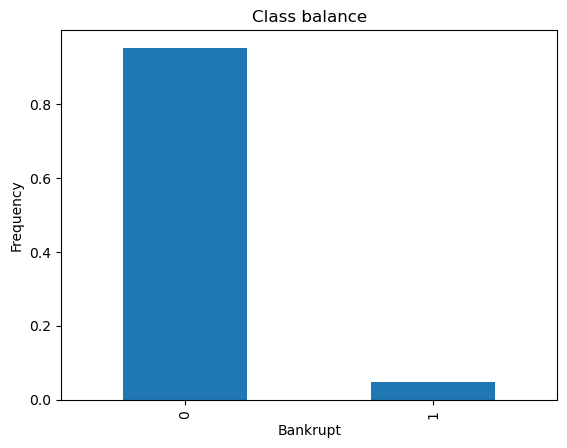

In [13]:
#Visualizing the frequency of each class as a bar chart 
df['bankrupt'].value_counts(normalize=True).plot(kind ='bar')
plt.xlabel('Bankrupt')
plt.ylabel('Frequency')
plt.title('Class balance')
plt.show()

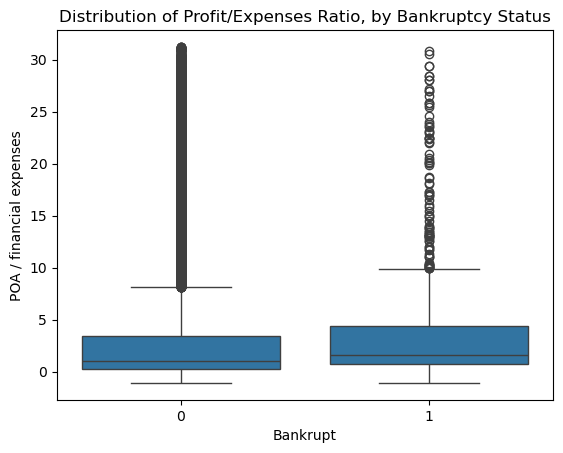

In [7]:
# Create clipped boxplot
low, high = df['A27'].quantile([0.1, 0.9])
mask = df['A27'].between(low, high)
sns.boxplot(y = 'A27' , x = 'bankrupt' , data = df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Bankruptcy Status")
plt.show()

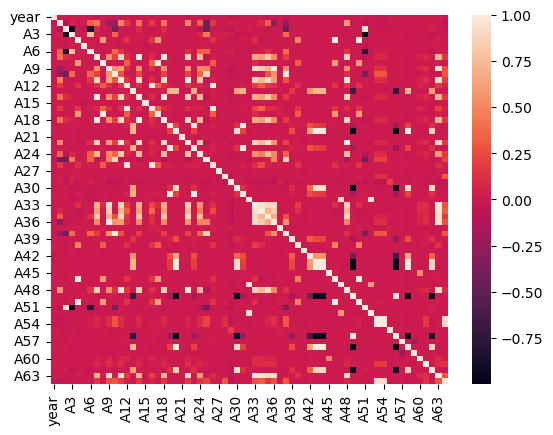

In [8]:
#Plotting a correlation heatmap of features in df. Since "bankrupt" will be your target
correlation = df.drop(columns ='bankrupt').corr()
sns.heatmap(correlation);

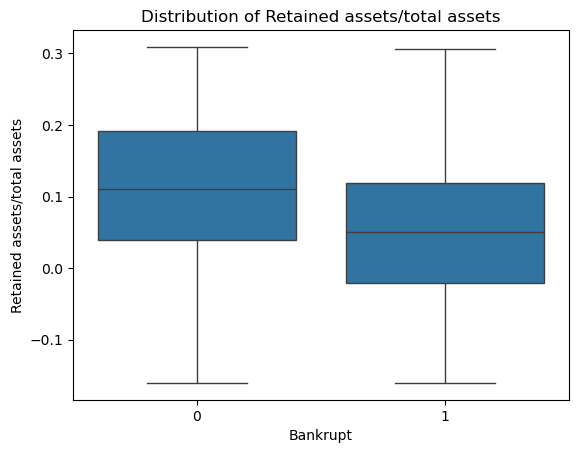

In [14]:
#Visualizing the distribution of Retained assets/total assets after removing outliers

low, high = df['A6'].quantile([0.1, 0.9])
mask = df['A26'].between(low, high)
sns.boxplot(y = 'A26' , x = 'bankrupt' , data = df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("Retained assets/total assets")
plt.title("Distribution of Retained assets/total assets")
plt.show()

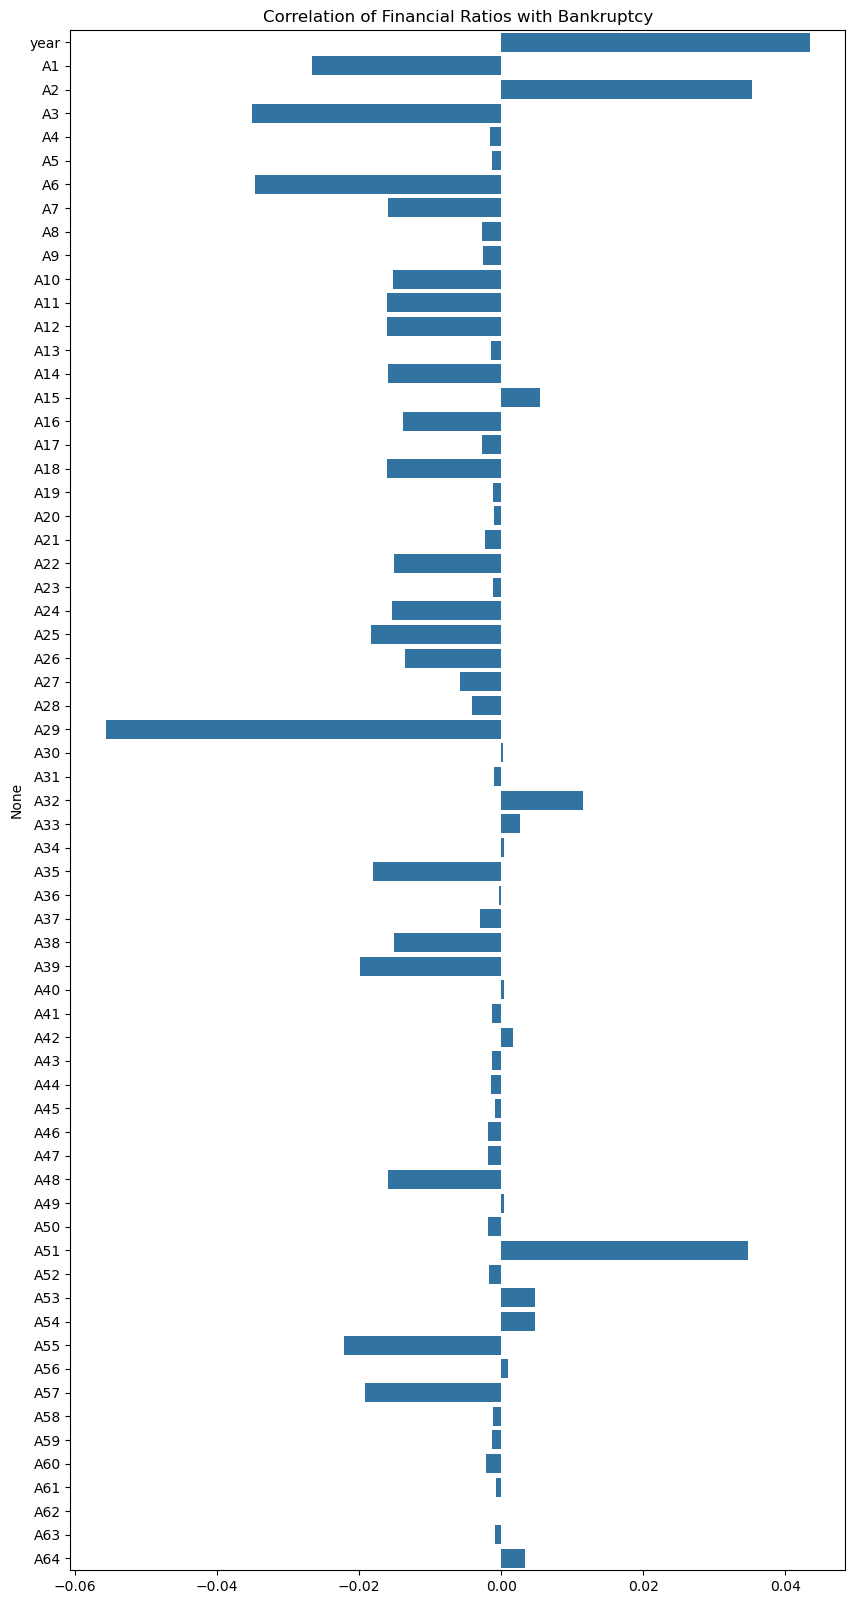

In [15]:

correlation = df.corr()['bankrupt'].drop('bankrupt')
plt.figure(figsize=(10, 20))
sns.barplot(x=correlation.values, y=correlation.index)
plt.title("Correlation of Financial Ratios with Bankruptcy")
plt.show()


# Split

In [16]:
#Spliting the target and feature column
X = df.drop(columns = 'bankrupt') #features
y = df['bankrupt']#target

In [17]:
#Spliting to get our test and training set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Resample (imbalance)

In [18]:
#Resample over
RandomSampler = RandomOverSampler(random_state = 42)
X_train_over, y_train_over = RandomSampler.fit_resample(X_train, y_train)

In [19]:
#Resample Under

RandomSampler = RandomUnderSampler(random_state = 42)
X_train_under, y_train_under = RandomSampler.fit_resample(X_train, y_train)

In [20]:
X_train_under

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
18536,3,-0.196780,0.725500,0.181880,3.0821,25.056,0.000000,-0.238160,0.37837,0.65133,...,4016.60,-0.330730,-0.716850,-0.42584,2.045500,5.1974,6.0054,48.952,7.4563,0.8913
42811,5,0.341250,0.110950,0.596120,6.7003,30.043,0.000000,0.420400,8.01330,1.28400,...,6654.70,0.331860,0.383830,0.67452,0.000000,2.4704,12.9360,29.729,12.2780,4.2898
30364,4,0.011582,0.824950,0.093030,1.1902,-24.185,0.000000,0.011582,0.21219,1.69320,...,1161.30,0.018158,0.066162,0.99328,1.674900,8.9392,4.4818,105.440,3.4618,4.0523
9978,2,0.547970,0.077456,0.668220,9.7478,464.280,0.000000,0.678620,11.91000,1.34210,...,796.30,0.597590,0.593980,0.50191,0.000000,NaN,11.0110,20.775,17.5690,5.2551
32936,4,-0.022274,0.657270,0.291070,1.7282,17.059,0.000000,-0.022274,0.52144,1.32110,...,262.05,-0.803580,-0.064990,1.00940,0.000000,7.4160,5.4275,110.440,3.3050,4.2729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43021,5,-0.198460,0.906480,0.016908,1.0208,-118.040,0.000113,-0.201490,0.10305,1.46650,...,145.00,-0.011211,-2.124500,1.00860,0.497750,2.7955,5.3955,202.740,1.8003,8.7098
43323,5,0.410640,0.579580,0.331130,2.1120,48.678,-0.575170,0.383910,0.72539,1.83920,...,2403.00,0.211660,0.976730,0.78845,0.000000,13.1890,4.2011,59.097,6.1763,4.9562
27480,3,-0.026362,0.469130,0.197570,2.3151,17.557,-0.026362,-0.030840,0.98456,1.00720,...,64417.00,0.007159,-0.057074,0.99284,0.690410,5.2227,4.4094,66.143,5.5184,1.2712
37194,4,0.007802,0.075943,0.924060,13.1680,160.600,0.661700,0.022123,12.16800,2.13710,...,245.18,0.030774,0.008443,0.95913,0.000000,NaN,19.6750,12.971,28.1400,NaN


# Baseline

In [21]:
#Baseline model

baseline= y_train.value_counts(normalize= True).max()

In [22]:
baseline

0.9524824328994356

# Building Model

In [19]:

model_ori = make_pipeline(SimpleImputer(strategy= 'median'), DecisionTreeClassifier(random_state=42))
model_ori.fit(X_train, y_train)

model_over = make_pipeline(SimpleImputer(strategy= 'median'), DecisionTreeClassifier(random_state=42))
model_over.fit(X_train_over, y_train_over)

model_under = make_pipeline(SimpleImputer(strategy= 'median'), DecisionTreeClassifier(random_state=42))
model_under.fit(X_train_under, y_train_under)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [20]:
#checking the accuracy score of our models
for m in [model_ori, model_over, model_under]:
    training_score = m.score(X_train, y_train)
    test_score = m.score(X_test, y_test)
    print("Training Accuracy:", round(training_score, 4))
    print("Test Accuracy:", round(test_score, 4))

   
    

Training Accuracy: 1.0
Test Accuracy: 0.9506
Training Accuracy: 1.0
Test Accuracy: 0.9523
Training Accuracy: 0.8074
Test Accuracy: 0.7842


X_train_over and y_train_over will be our best model here 

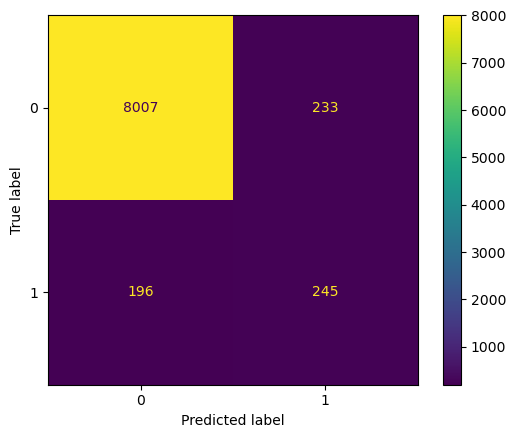

In [21]:
#Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model_ori, X_test, y_test);

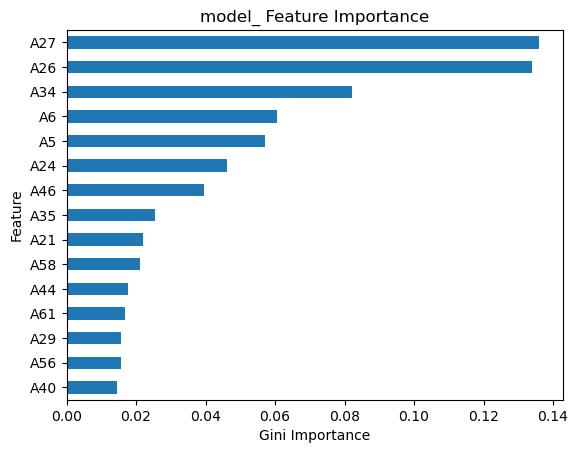

In [36]:
# Get importances
importances = model_over.named_steps['decisiontreeclassifier'].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index= X_train.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_ Feature Importance");

# Iterate

In [37]:
#creating a pipeline named clf
clf = make_pipeline(SimpleImputer(), RandomForestClassifier(random_state= 42))

In [24]:
#cross validation score 

cross_validation = cross_val_score(clf, X_train, y_train, cv=5 , n_jobs= -1)
cross_validation



array([0.96789057, 0.96601872, 0.96328294, 0.96688265, 0.96586982])

In [38]:
#dictionary with the range of hyperparameters

param = {'simpleimputer__strategy': ['mean', 'median'], 'randomforestclassifier__n_estimators': range(25, 100, 25), 'randomforestclassifier__max_depth': range(10,50,10)}


In [39]:
#Create a GridSearchCV named model that includes your classifier and hyperparameter grid.

model = GridSearchCV( clf, param_grid = param, cv=5 , n_jobs=-1, verbose =1)

In [40]:
#Fitting our model with the train set

model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [41]:
cv_result= pd.DataFrame(model.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,21.820947,0.868468,0.186727,0.055281,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.949584,0.950265,0.951550,0.952151,0.945196,0.949749,0.002451,21
1,24.422363,0.390842,0.173605,0.023605,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.942555,0.942479,0.948224,0.943836,0.944138,0.944246,0.002097,24
2,45.093404,1.237436,0.259968,0.016180,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.951550,0.951398,0.954497,0.948976,0.944667,0.950218,0.003281,20
3,45.403408,0.705503,0.265986,0.023356,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.944898,0.942404,0.947770,0.943004,0.945574,0.944730,0.001917,23
4,66.153438,0.342591,0.375873,0.041237,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.953288,0.952532,0.953439,0.949278,0.947615,0.951230,0.002353,19
5,67.374750,0.190025,0.353590,0.006975,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.949282,0.945351,0.948980,0.945272,0.943533,0.946484,0.002259,22
6,28.358616,0.110258,0.202869,0.009663,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.996750,0.995238,0.995389,0.996220,0.994709,0.995661,0.000729,15
7,29.786491,0.190252,0.210620,0.014334,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.995314,0.995238,0.994709,0.994482,0.993726,0.994694,0.000577,18
8,55.324351,0.341042,0.359463,0.015068,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.996296,0.995692,0.995692,0.996674,0.995087,0.995888,0.000548,14
9,57.480503,0.245604,0.362153,0.015826,20,50,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.995918,0.995465,0.994633,0.995389,0.993726,0.995026,0.000770,17


In [42]:
#best params

model.best_params_

{'randomforestclassifier__max_depth': 40,
 'randomforestclassifier__n_estimators': 75,
 'simpleimputer__strategy': 'mean'}

In [43]:
#Best estimator
model.best_estimator_

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=40, n_estimators=75,
                                        random_state=42))])

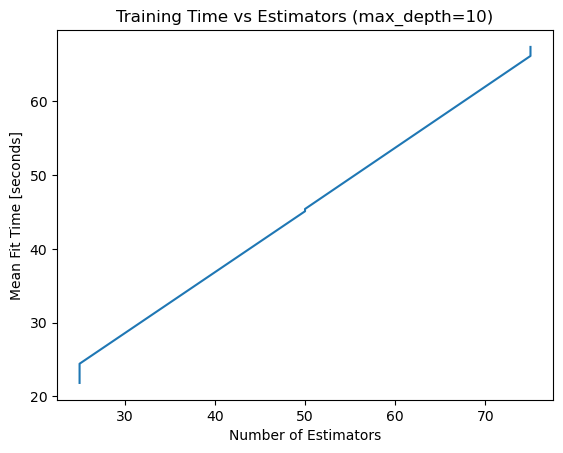

In [44]:
# Create mask
mask= cv_result['param_randomforestclassifier__max_depth'] == 10
# Plot fit time vs n_estimators
plt.plot(cv_result[mask]['param_randomforestclassifier__n_estimators'], cv_result[mask]['mean_fit_time'])
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

# Evaluate

In [46]:
#Accuracy score
Training_score= model.score(X_train, y_train)
Test_score= model.score(X_test, y_test)

print(Training_score)
print(Test_score)

1.0
0.9665937104020275


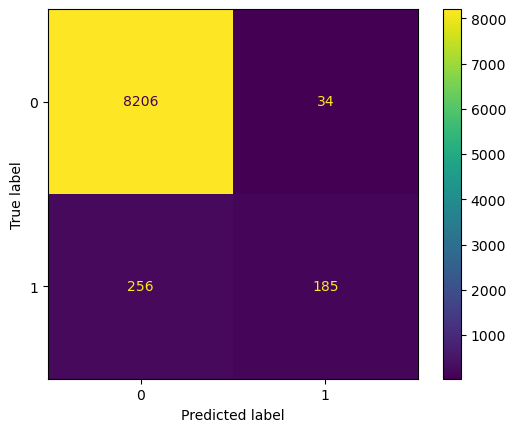

In [47]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

# Communicate Result

In [48]:
# Getting feature names from training data and extracting importances from model and then creating a series with them

importance = model.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
features = X_train.columns
feat_imp = pd.Series(importance, index = features).sort_values()

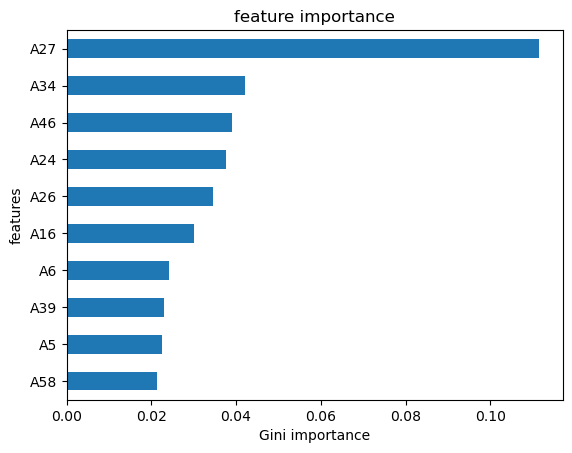

In [49]:
# Plotting the 10 most important features

feat_imp.tail(10).plot(kind= 'barh')
plt.xlabel('Gini importance')
plt.ylabel('features')
plt.title('feature importance')
plt.show()

# Saving the model

In [50]:
#SAve model

with open('model-5-3.pkl', 'wb') as f:
    model = pickle.dump(model, f)

# Making predicitons with the save model

In [51]:
def make_prediction(datafile, model_file):
    X_test = pd.read_csv(datafile)
    with open('model-5-3.pkl' , 'rb') as f:
        model = pickle.load(f)
    y_pred = model.predict(X_test)
    y_test_pred = pd.Series(y_pred, index = X_test.index ,name= 'bankrupt')
    return y_test_pred